### Example 1 - Data Extraction: Make a Graph of Market History (With Libraries)

This is just a repeat of the example 1 implemented using the evekit libraries we provide
in our [GitHub project](https://github.com/OrbitalEnterprises/eve-market-strategies).

In this example, we construct a simple graph of average daily price of Tritanium in The Forge.

There are four steps:

1. Use the SDE to look up type and region ID, respectively, for "Tritanium" and "The Forge".
2. Construct a date range consisting of every day from a year ago until today.
3. Fetch daily market averages for every date in our date range and store the data in a Pandas DataFrame.
4. Graph the average price from the DataFrame.


In [1]:
# Standard imports
import pandas as pd
import numpy as np
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# Include evekit libraries we need for this example
from evekit.reference import Client
from evekit.online import Download
from evekit.marketdata import MarketHistory

In [3]:
# Step 1 - lookup type and region info from the SDE
#
# We're going to show off a bit and include Domain as well as The Forge to show some interesting features.
#
# NOTE: the library version of the clients sets "also_return_response" to True for the Bravado client
# This means the result is a 2-tuple (result, response), hence the extra de-reference as compared to
# the original example.  If we wanted to do proper error handling, we should do something like:
#
# result, response = sde_client.Inventory.getTypes(typeName="{values: ['Tritanium']}").result()
# if response.status_code == 200:
#   type_id = result[0]['typeID']
# else:
#   ...error...
# 
sde_client = Client.SDE.get()
type_id = sde_client.Inventory.getTypes(typeName="{values: ['Tritanium']}").result()[0][0]['typeID']
region_id = sde_client.Map.getRegions(regionName="{values: ['The Forge']}").result()[0][0]['regionID']
domain_region_id = sde_client.Map.getRegions(regionName="{values: ['Domain']}").result()[0][0]['regionID']
print("Using type_id=%d, region_id=%d, domain_region_id=%d" % (type_id, region_id, domain_region_id))

Using type_id=34, region_id=10000002, domain_region_id=10000043


In [4]:
# Step 2 - Construct a date range consisting of every day from a year ago until today.
#
import datetime
date_range = pd.date_range(datetime.date.today() - datetime.timedelta(days=365), datetime.date.today())

In [5]:
# Step 3 - Fetch daily market averages for every date in our date range and store the data in a Pandas DataFrame.
#
# This time, we'll let evekit do all the work for us, but to make it interesting we'll download part of the
# history to a local directory and tell evekit to use data from the local directory if it's available.
#
# First, download the first week of data in our date range
Download.download_market_history_range(date_range[0:7], ".", dict(skip_missing=True, tree=True, verbose=True))

In [6]:
# Step 3 (cont'd)
#
# Now we'll use the MarketHistory object to create a Pandas DataFrame with our desired range.
# We'll tell the constructor to look in our local storage first before retrieving data remotely.
# We'll also include an additional region to show how to filter from a larger result.
#
market_history = MarketHistory.get_data_frame(dates=date_range, types=[type_id], regions=[region_id, domain_region_id], 
                                              config=dict(local_storage=".", tree=True, skip_missing=True, verbose=True))

# The result is a DataFrame just as we constructed in the first example, indexed by date.
# Note that the result includes two regions this time.
market_history

Retrieving 2016-03-11 00:00:00...done
Retrieving 2016-03-12 00:00:00...done
Retrieving 2016-03-13 00:00:00...done
Retrieving 2016-03-14 00:00:00...done
Retrieving 2016-03-15 00:00:00...done
Retrieving 2016-03-16 00:00:00...done
Retrieving 2016-03-17 00:00:00...done
Retrieving 2016-03-18 00:00:00...done
Retrieving 2016-03-19 00:00:00...done
Retrieving 2016-03-20 00:00:00...done
Retrieving 2016-03-21 00:00:00...done
Retrieving 2016-03-22 00:00:00...done
Retrieving 2016-03-23 00:00:00...done
Retrieving 2016-03-24 00:00:00...done
Retrieving 2016-03-25 00:00:00...done
Retrieving 2016-03-26 00:00:00...done
Retrieving 2016-03-27 00:00:00...done
Retrieving 2016-03-28 00:00:00...done
Retrieving 2016-03-29 00:00:00...done
Retrieving 2016-03-30 00:00:00...done
Retrieving 2016-03-31 00:00:00...done
Retrieving 2016-04-01 00:00:00...done
Retrieving 2016-04-02 00:00:00...done
Retrieving 2016-04-03 00:00:00...done
Retrieving 2016-04-04 00:00:00...done
Retrieving 2016-04-05 00:00:00...done
Retrieving 2

,avg_price,date,high_price,low_price,order_count,region_id,type_id,volume
2016-03-11,6.17,2016-03-11,6.21,6.08,1706,10000002,34,9475685302
2016-03-11,5.73,2016-03-11,5.95,5.68,634,10000043,34,2646295108
2016-03-12,6.20,2016-03-12,6.21,6.12,2224,10000002,34,10093627532
2016-03-12,5.91,2016-03-12,5.99,5.81,833,10000043,34,1834213762
2016-03-13,6.13,2016-03-13,6.19,6.08,2309,10000002,34,10106305956
2016-03-13,5.93,2016-03-13,5.99,5.88,865,10000043,34,1894276601
2016-03-14,6.12,2016-03-14,6.20,6.06,1955,10000002,34,8911383169
2016-03-14,5.96,2016-03-14,6.03,5.94,670,10000043,34,1849610927
2016-03-15,6.19,2016-03-15,6.20,6.09,1776,10000002,34,10230349265
2016-03-15,6.08,2016-03-15,6.09,5.77,673,10000043,34,2390860809


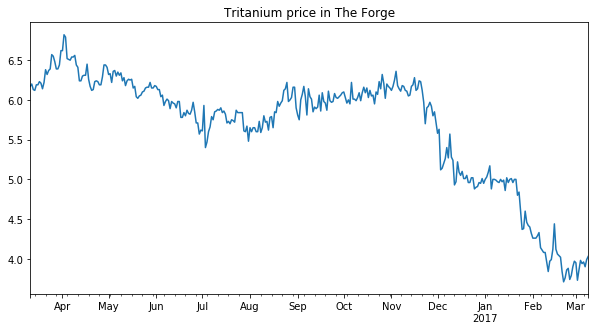

In [7]:
# Step 4 - Graph the average price from the DataFrame.
#
# We can graph the same as before but this time we need to filter by region ID since we fetched two regions
# We can now produce two graphs.  Here's the first:
market_history[market_history.region_id == 10000002].avg_price.plot(title="Tritanium price in The Forge", figsize=[10,5])


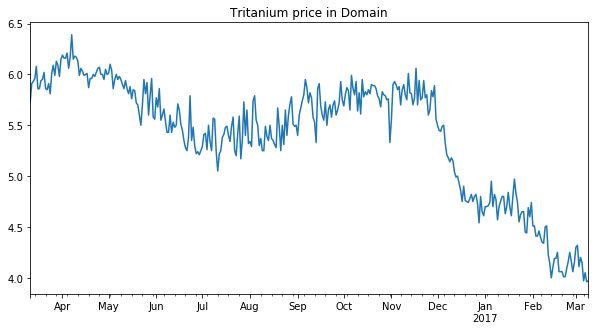

In [8]:
# and here's the second
market_history[market_history.region_id == 10000043].avg_price.plot(title="Tritanium price in Domain", figsize=[10,5])

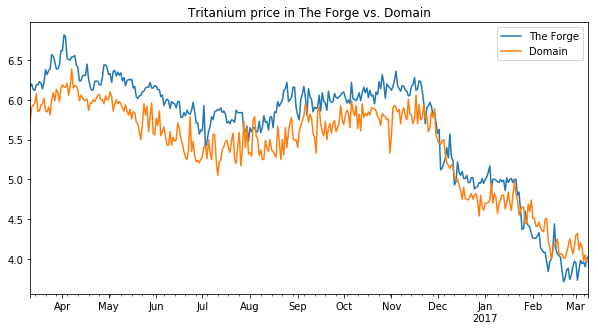

In [9]:
# and we can overlay them as well
market_history[market_history.region_id == 10000002].avg_price.plot(title="Tritanium price in The Forge vs. Domain", 
                                                                    figsize=[10,5],
                                                                    label="The Forge",
                                                                    legend=True)
market_history[market_history.region_id == 10000043].avg_price.plot(label="Domain", legend=True)